# Optogenetic Model Evaluation

In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

## Light Model

First we'll compare the model to the figure from Foutz et al. 2012.
![Foutz et al. 2012 Figure 2A]('foutz12_2a.jpg')


Text(0, 0.5, 'z (mm)')

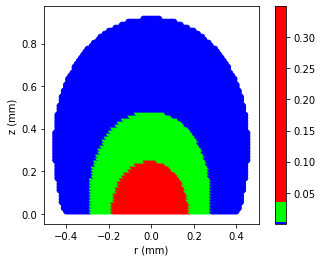

In [53]:
from matplotlib import colors
from brian2 import mm
import brian2.units.unitsafefunctions as usf

from clocsim.stimulators.opto import *
my_fiber = default_fiber
my_fiber['R0'] = 0.25*mm
opto = OptogeneticIntervention(name='opto', opsin_model=four_state, 
        opsin_params=ChR2_4s, light_source=my_fiber, wavelength=473*nmeter)

x = np.linspace(-0.5, 0.5, 100)
z = np.linspace(-0.1, 2, 150)
x, z = np.meshgrid(x, z)

dir_uvec = np.array([[0], [1]])

coords = np.vstack([x.flatten(), z.flatten()]).T
coords = coords*mm
zc = usf.dot(coords, dir_uvec)  # distance along cylinder axis
r = np.sqrt( np.sum( (coords-usf.dot(zc, dir_uvec.T))**2, axis=1 ) )
r = r.reshape((-1, 1))

T = opto._Foutz12_transmittance(r, zc)
# T[zc<0] = 0  # zero out points behind light
# filter out points with <0.001 transmittance to make plotting faster
plot_threshold = 0.0001
idx_to_plot = T[:,0] >= plot_threshold
x = x.flatten()[idx_to_plot]; z = z.flatten()[idx_to_plot]
T = T[idx_to_plot, 0]
plt.scatter(x, z, c=T,
        cmap=colors.LinearSegmentedColormap(
            'Foutz12', segmentdata={
                'red': [(0, 0, 0),
                        (.1, 0, 1),
                        (1, 1, 1)],
                'green': [(0, 0, 0),
                          (.01, 0, 1),
                          (.1, 1, 0),
                          (1, 0, 0)],
                'blue': [(0, 0, 1),
                         (.001, 1, 1),
                         (.01, 1, 0),
                         (1, 0, 0)]
            }), 
        marker='o')

plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')